In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score
%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")


In [2]:
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
def plot_confusion_matrix(data_labels, data_preds, labels=labels):
    fig, (ax1) = plt.subplots(1, sharex='col', figsize=(10, 7))
    cnf_matrix = confusion_matrix(data_labels, data_preds)

    cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)

    sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="PuBu",ax=ax1).set_title("Test")
    plt.show()

In [3]:
def evaluate_model(data_labels, data_preds):
    print("Cohen Kappa score: %.3f" % cohen_kappa_score(data_labels, data_preds, weights='quadratic'))

In [7]:
test = pd.read_csv('../output/test.csv')
test_preds = pd.read_csv('../output/fold_1/result.csv')
data_labels = test["diagnosis"].tolist()
print(len(data_labels))
data_preds = test_preds["diagnosis"].tolist()
print(len(data_preds))


2690
2690


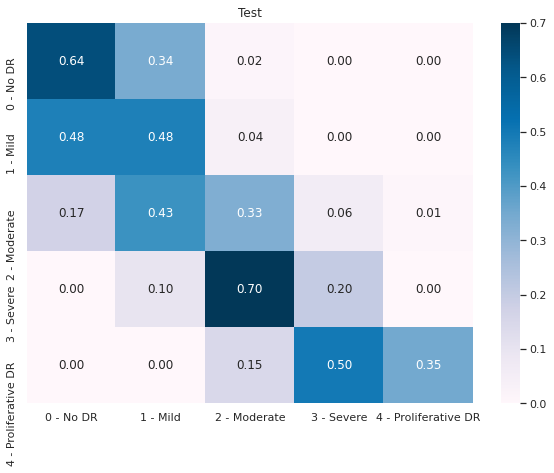

In [8]:
plot_confusion_matrix(data_labels, data_preds)

In [9]:
evaluate_model(data_labels, data_preds)

Cohen Kappa score: 0.444
